In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as ply
import seaborn as sns
%matplotlib inline
df = pd.read_excel('/home/aryan/Downloads/MLS_SalariesEXL.xlsx')
df.head()

Year Club (grouped)  Club Position  Total Compensation  Base Salary
0  2018            TFC   TOR        F             7115556      5600000
1  2018            TFC   TOR        M             6500000      6000000
2  2018           LAFC  LAFC        F             6292500      4500000
3  2018            CHI   CHI        M             6100000      6100000
4  2018            LAG    LA        F             6000000      4250000

In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf  
cf.go_offline()  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6219 entries, 0 to 6218
Data columns (total 6 columns):
Year                  6219 non-null int64
Club (grouped)        6219 non-null object
Club                  6219 non-null object
Position              6218 non-null object
Total Compensation    6219 non-null int64
Base Salary           6219 non-null int64
dtypes: int64(3), object(3)
memory usage: 291.6+ KB


In [4]:
df.describe()

Year  Total Compensation   Base Salary
count  6219.000000        6.219000e+03  6.219000e+03
mean   2013.130407        2.288526e+05  2.056110e+05
std       3.371766        6.094917e+05  5.453533e+05
min    2007.000000        1.290000e+04  1.290000e+04
25%    2010.000000        5.500000e+04  5.224400e+04
50%    2013.000000        9.649800e+04  8.250000e+04
75%    2016.000000        1.850000e+05  1.700000e+05
max    2018.000000        7.167500e+06  6.660000e+06

In [5]:
for i in ['Total Compensation','Base Salary']:
    print('\t'*6+i)
    df[i].iplot()
    print('\n')

						Total Compensation




						Base Salary


In [6]:
for i in ['Club (grouped)','Club','Position']:
    for j in ['Total Compensation','Base Salary']:
        print('\t'*5+i+' - '+j)
        df.iplot(kind='bar',x=i,y=j)

					Club (grouped) - Total Compensation


					Club (grouped) - Base Salary


					Club - Total Compensation


					Club - Base Salary


					Position - Total Compensation


					Position - Base Salary


# Total Compensation

In [7]:
print('\t'*5+' Club - Position')
df.iplot(kind='bar',x=['Club','Position'],y='Total Compensation')

					 Club - Position


In [8]:
print('\t'*5+' Position - Club')
df.iplot(kind='bar',x=['Position','Club'],y='Total Compensation')

					 Position - Club


In [9]:
print('\t'*5+' Club (grouped) - Club')
df.iplot(kind='bar',x=['Club (grouped)','Club'],y='Total Compensation')

					 Club (grouped) - Club


# Base Salary

In [10]:
print('\t'*5+' Club - Position')
df.iplot(kind='bar',x=['Club','Position'],y='Base Salary')

					 Club - Position


In [11]:
print('\t'*5+' Position - Club')
df.iplot(kind='bar',x=['Position','Club'],y='Base Salary')

					 Position - Club


In [12]:
print('\t'*5+' Club (grouped) - Club')
df.iplot(kind='bar',x=['Club (grouped)','Club'],y='Base Salary')

					 Club (grouped) - Club


In [13]:
print('\t'*4+' Mean')
df[['Total Compensation','Base Salary']].mean().iplot(kind='bar')

				 Mean


In [14]:
print('\t'*5+'Box Plot')
df[['Total Compensation','Base Salary']].iplot(kind='box')

					Box Plot


# Pie Charts

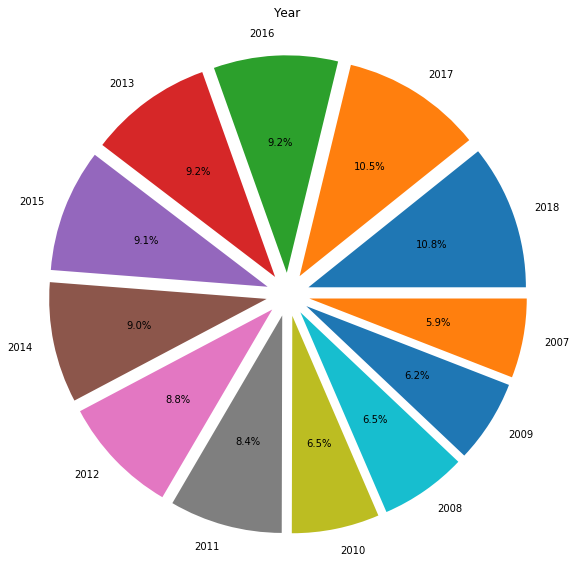

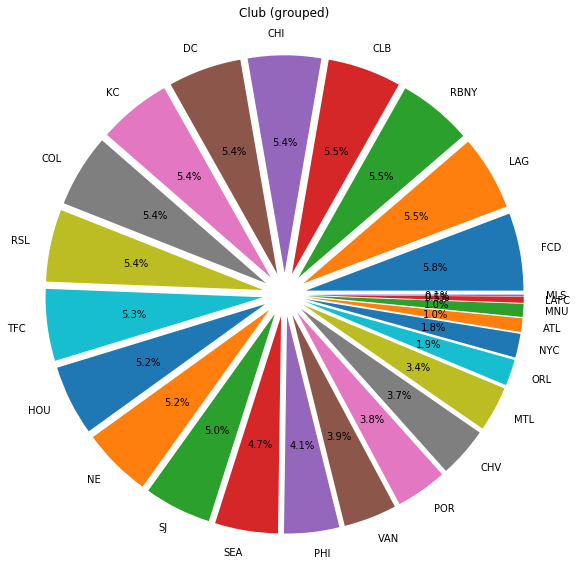

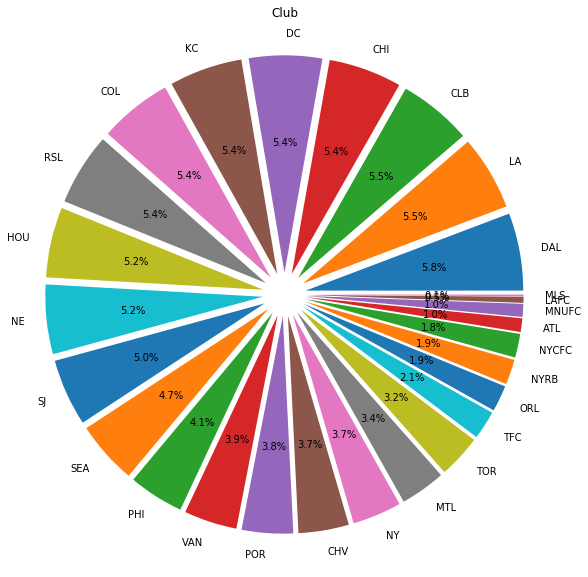

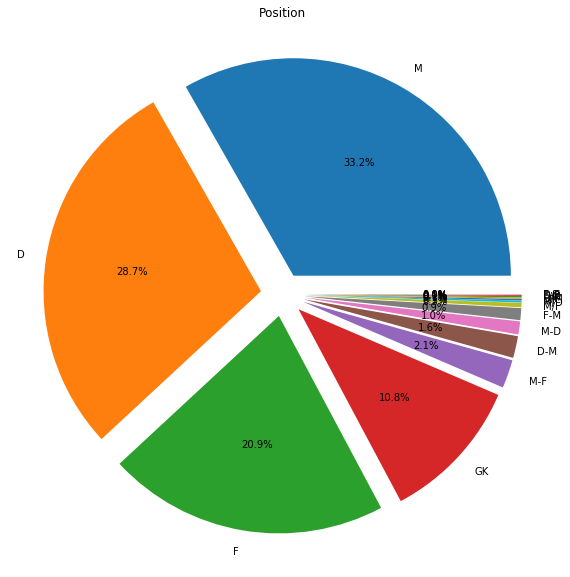

In [16]:
for i in ['Year','Club (grouped)','Club','Position']:
    A = df[i].value_counts().index.tolist()
    Vals = list(pd.value_counts(df[i]))
    explode = [0.1]*len(A)
    plt.figure(figsize=(10,10))
    plt.pie(Vals,explode=explode,labels=A,autopct='%.1f%%')
    plt.title(i)
    plt.show()

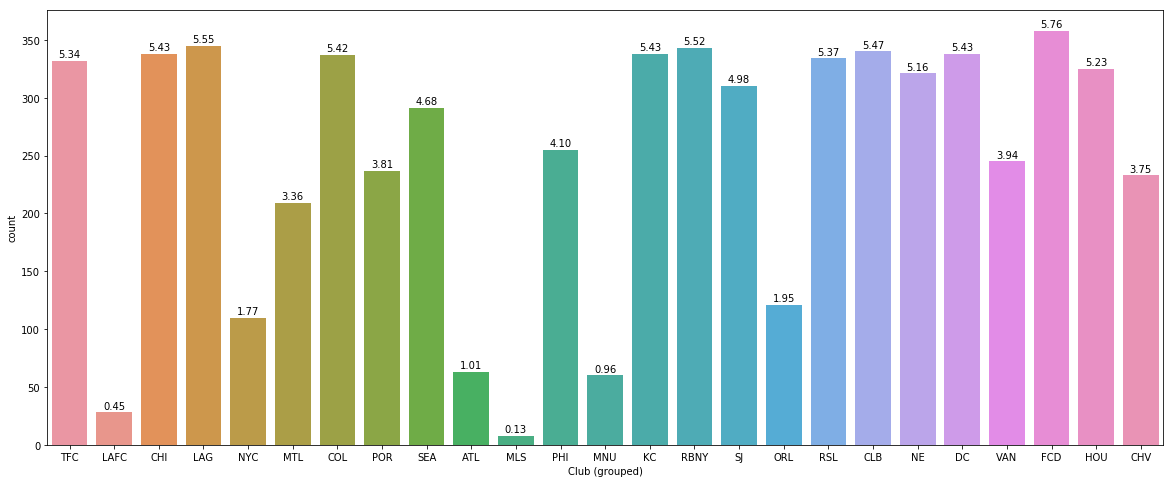

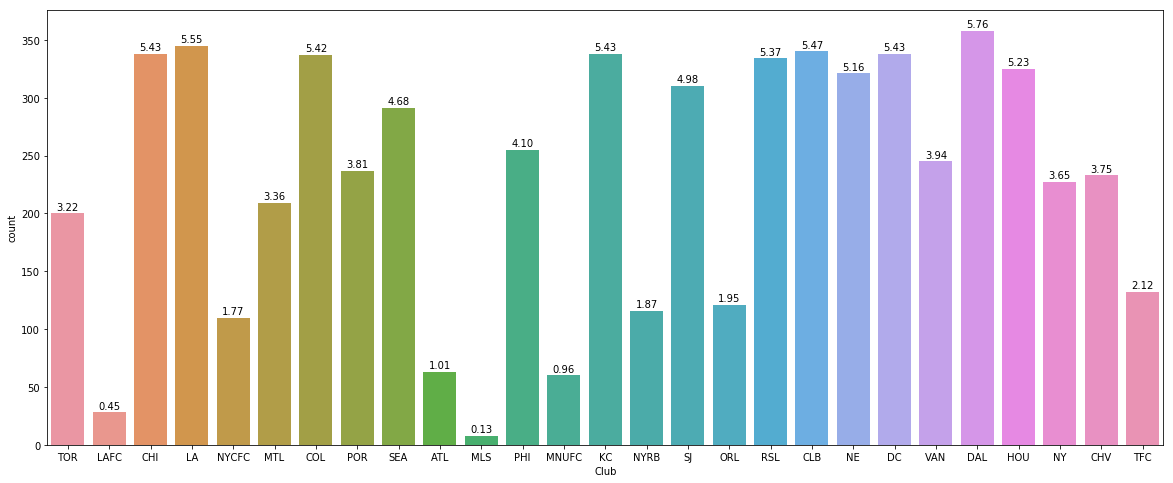

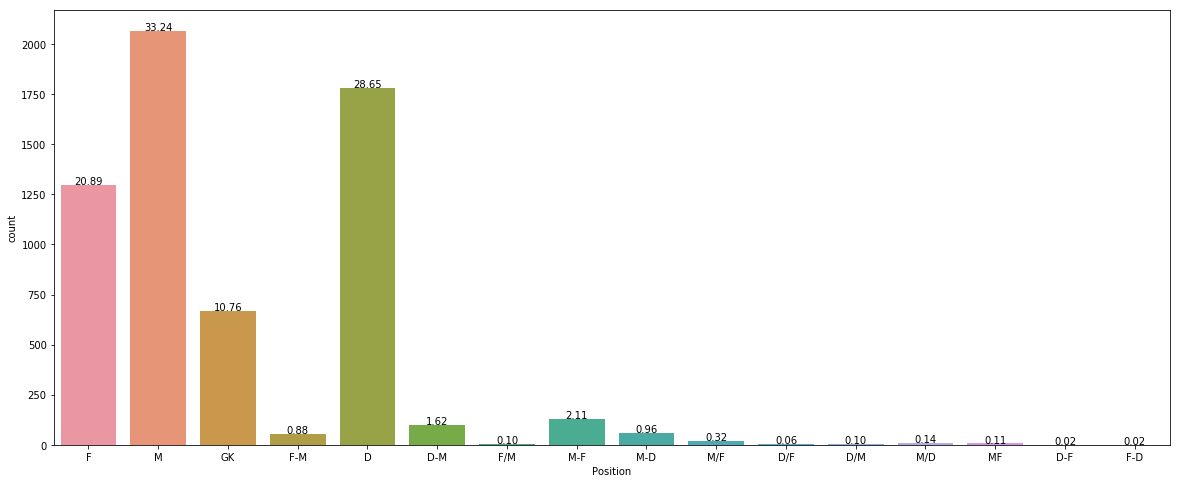

In [17]:
total = float(len(df))
for i in ['Club (grouped)','Club','Position']:
    plt.figure(figsize=(20,8))

    ax = sns.countplot(x=i, data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
plt.show()

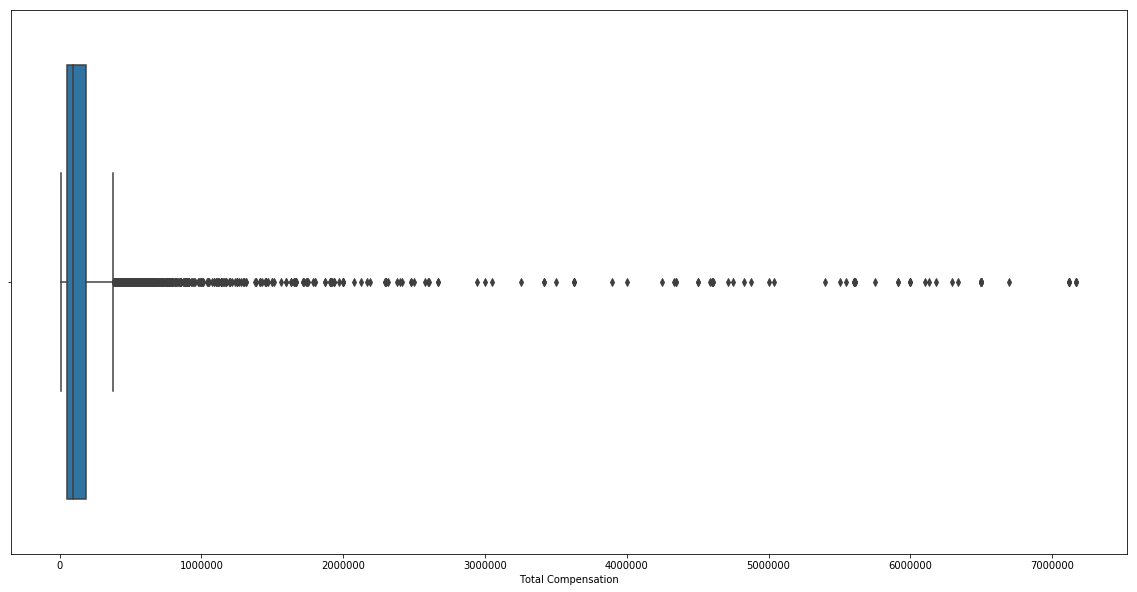

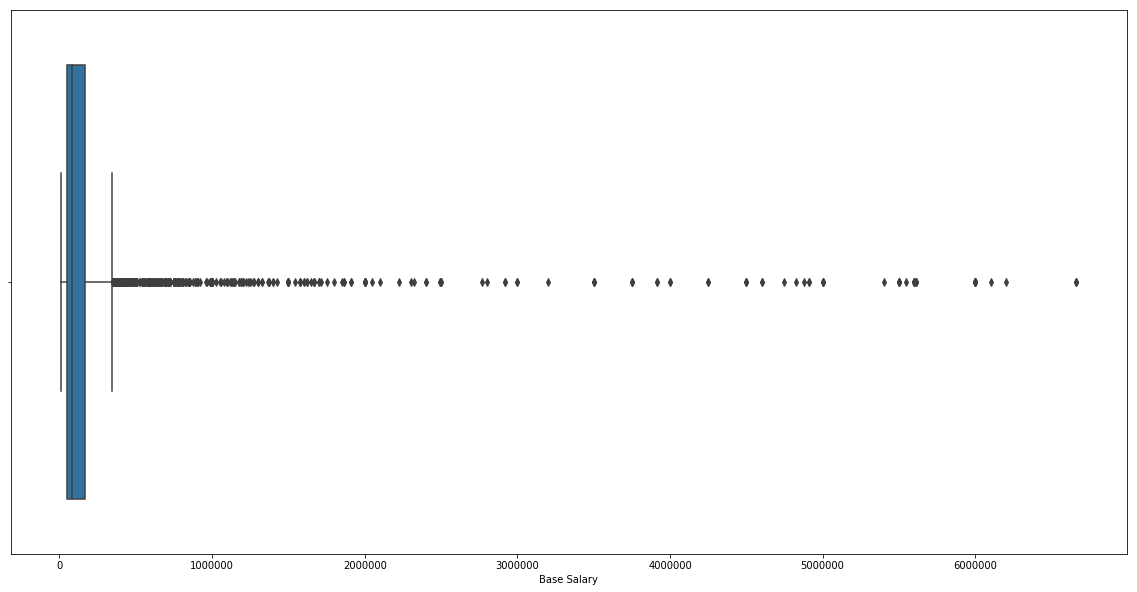

In [18]:
for i in ['Total Compensation','Base Salary']:
    plt.figure(figsize=(20,10))
    sns.boxplot(df[i])
    plt.show()

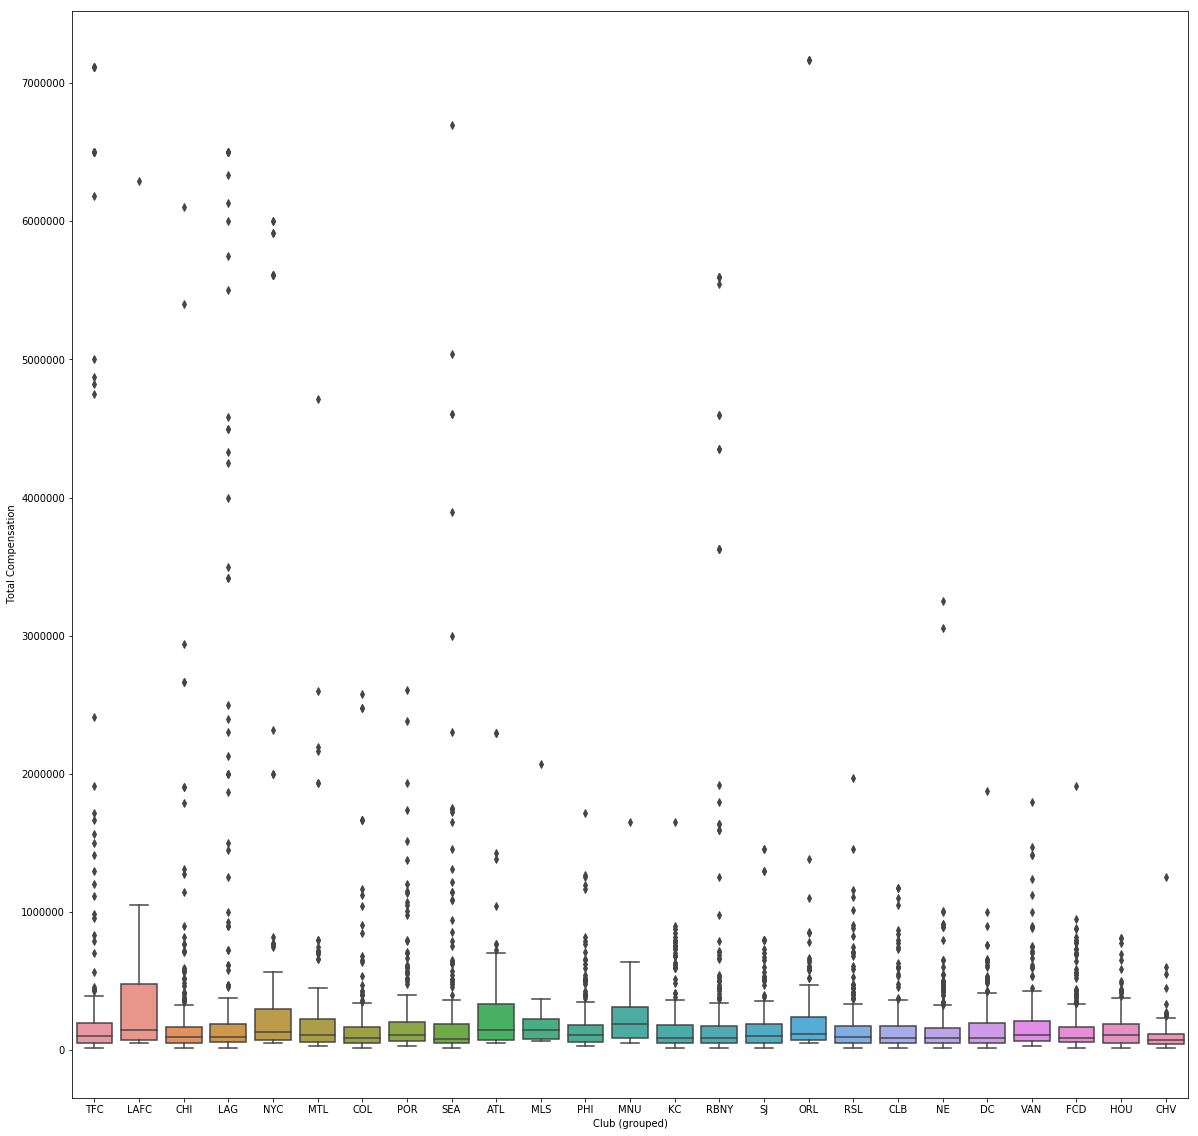

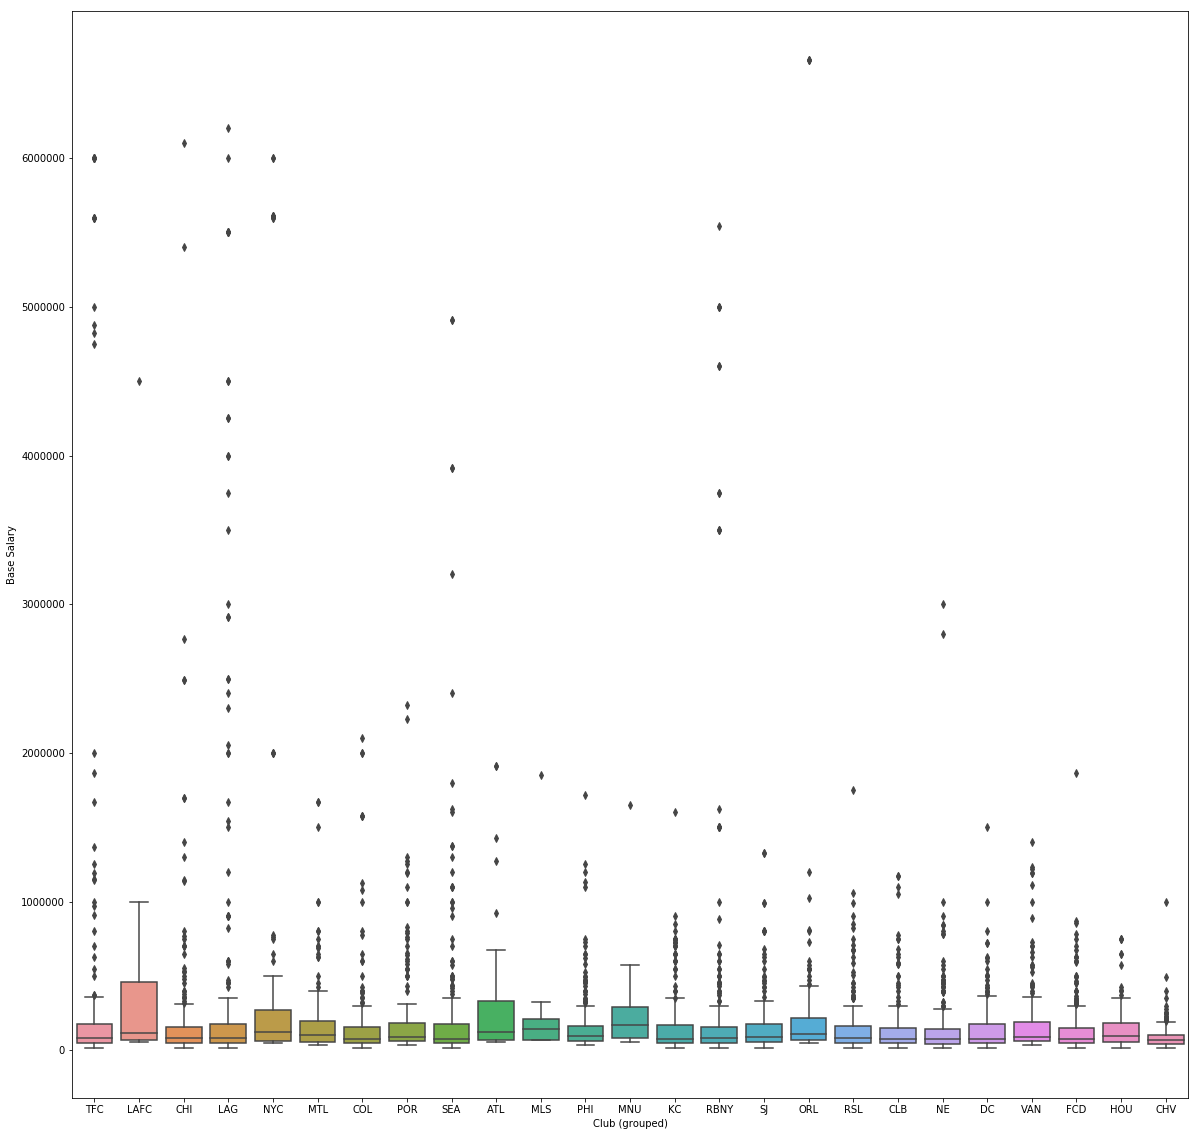

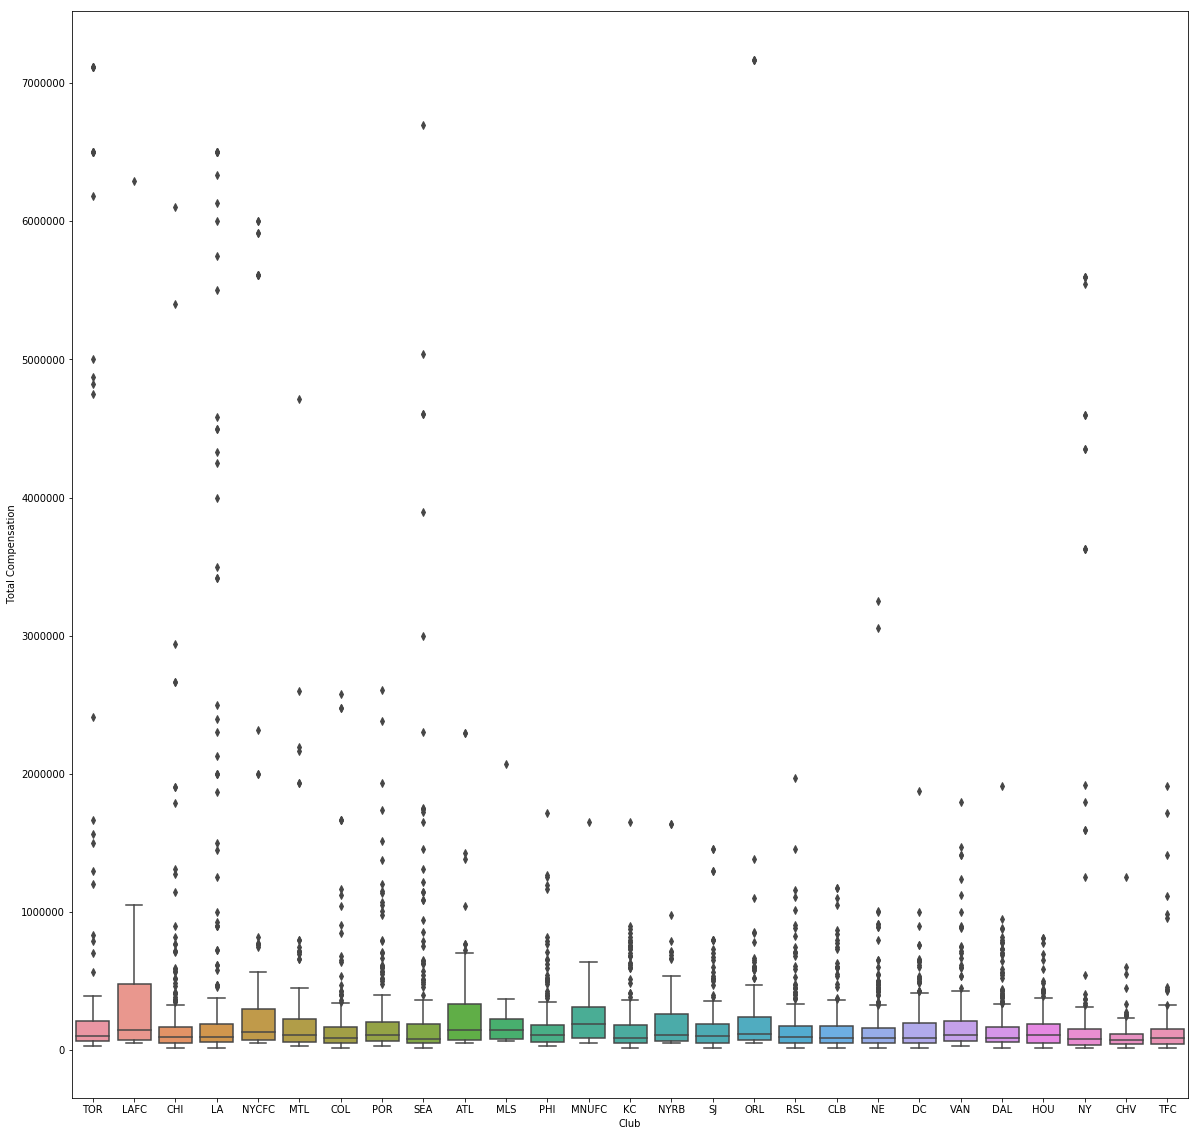

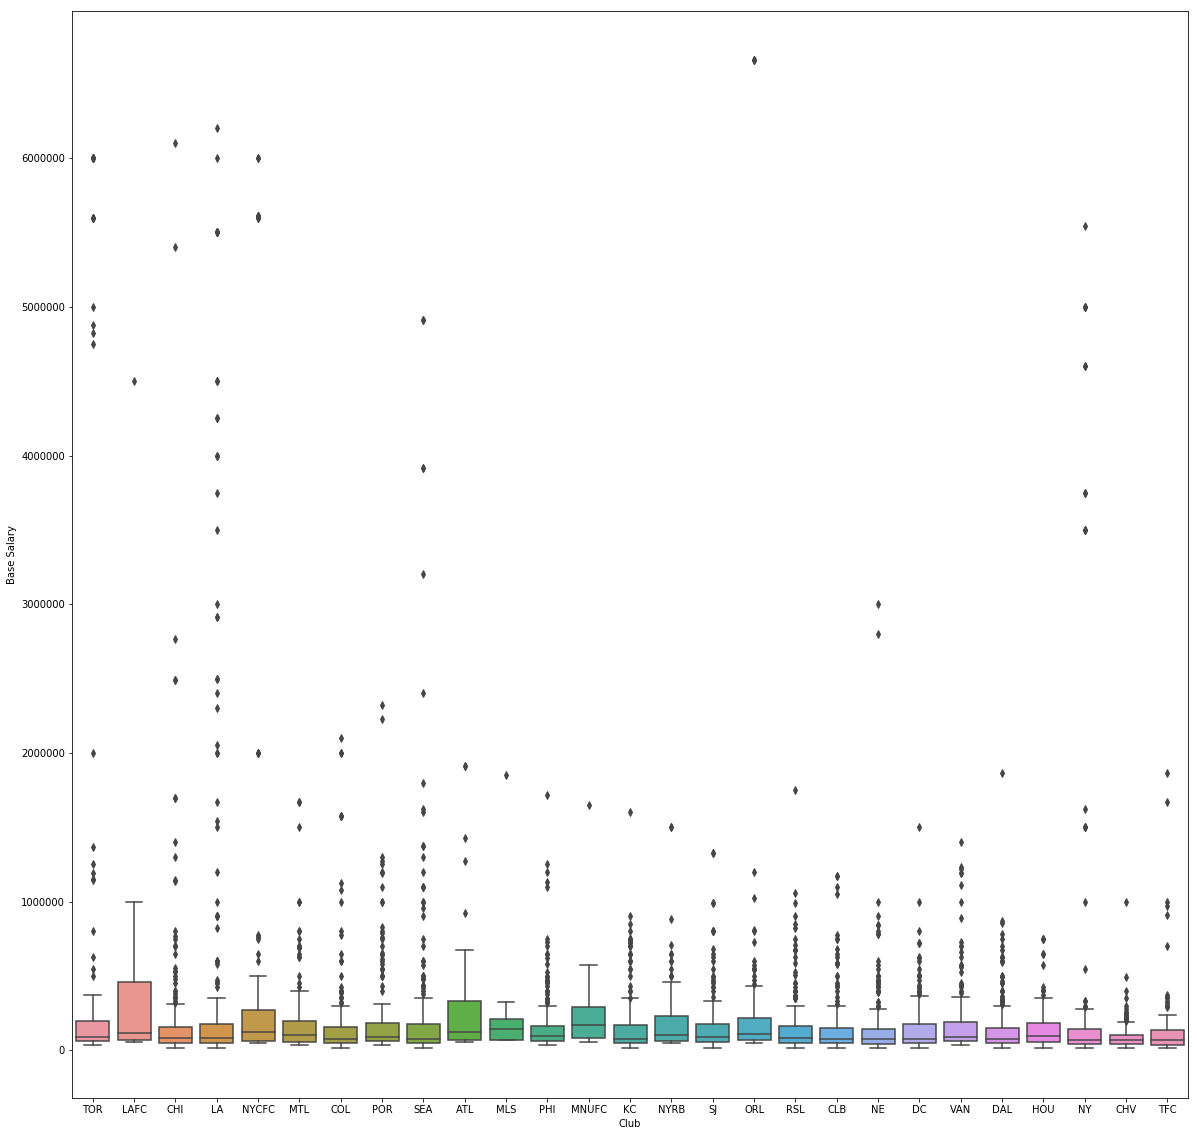

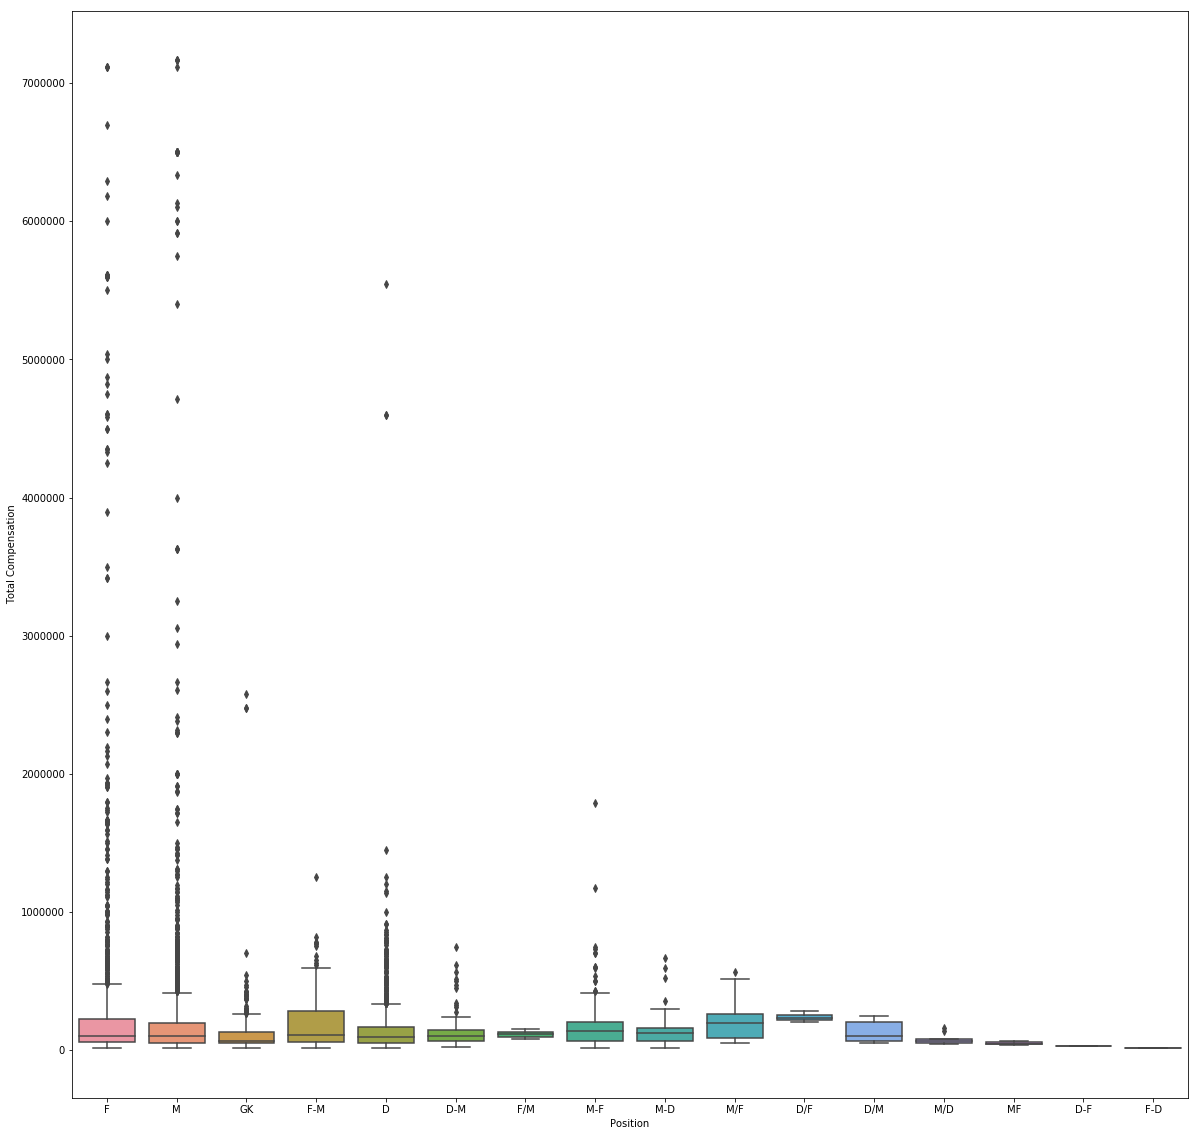

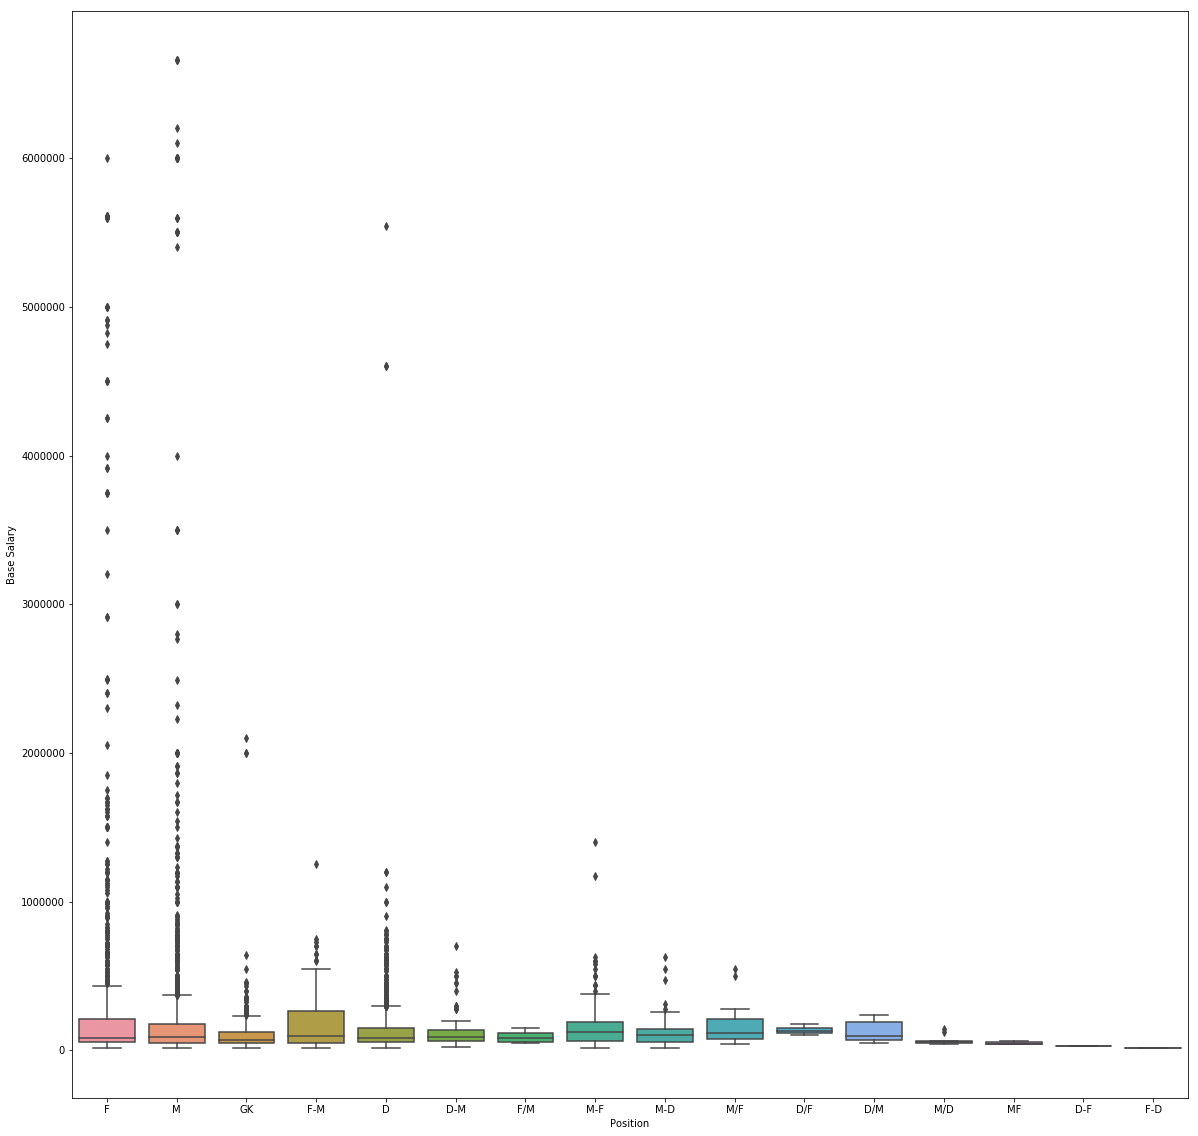

In [19]:
for i in ['Club (grouped)','Club','Position']:
    for j in ['Total Compensation','Base Salary']:
        plt.figure(figsize=(20,20))
        sns.boxplot(x=i,y=j,data=df);
        plt.show()

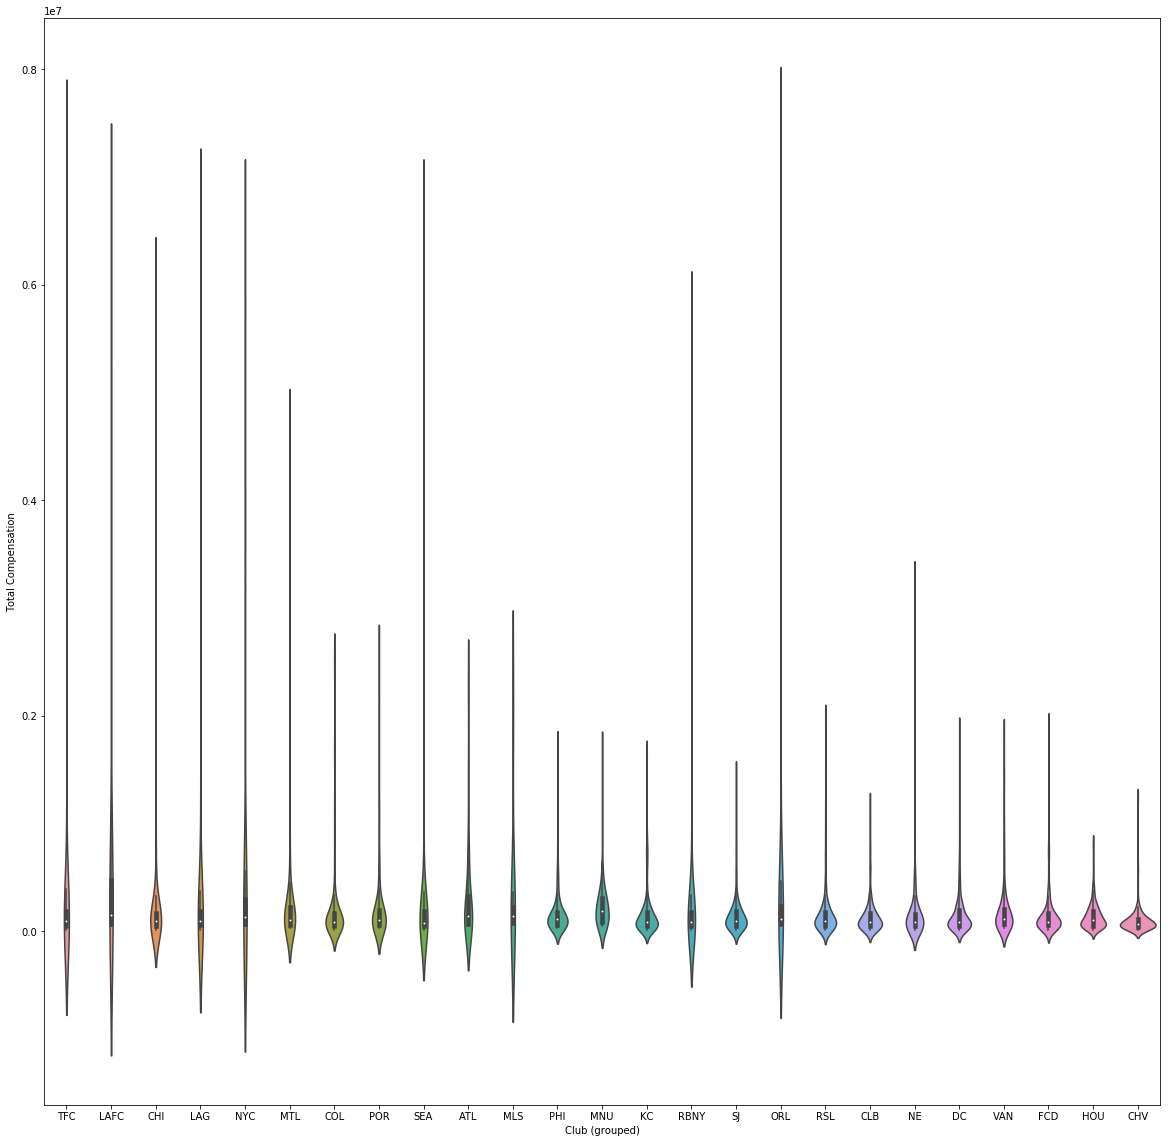

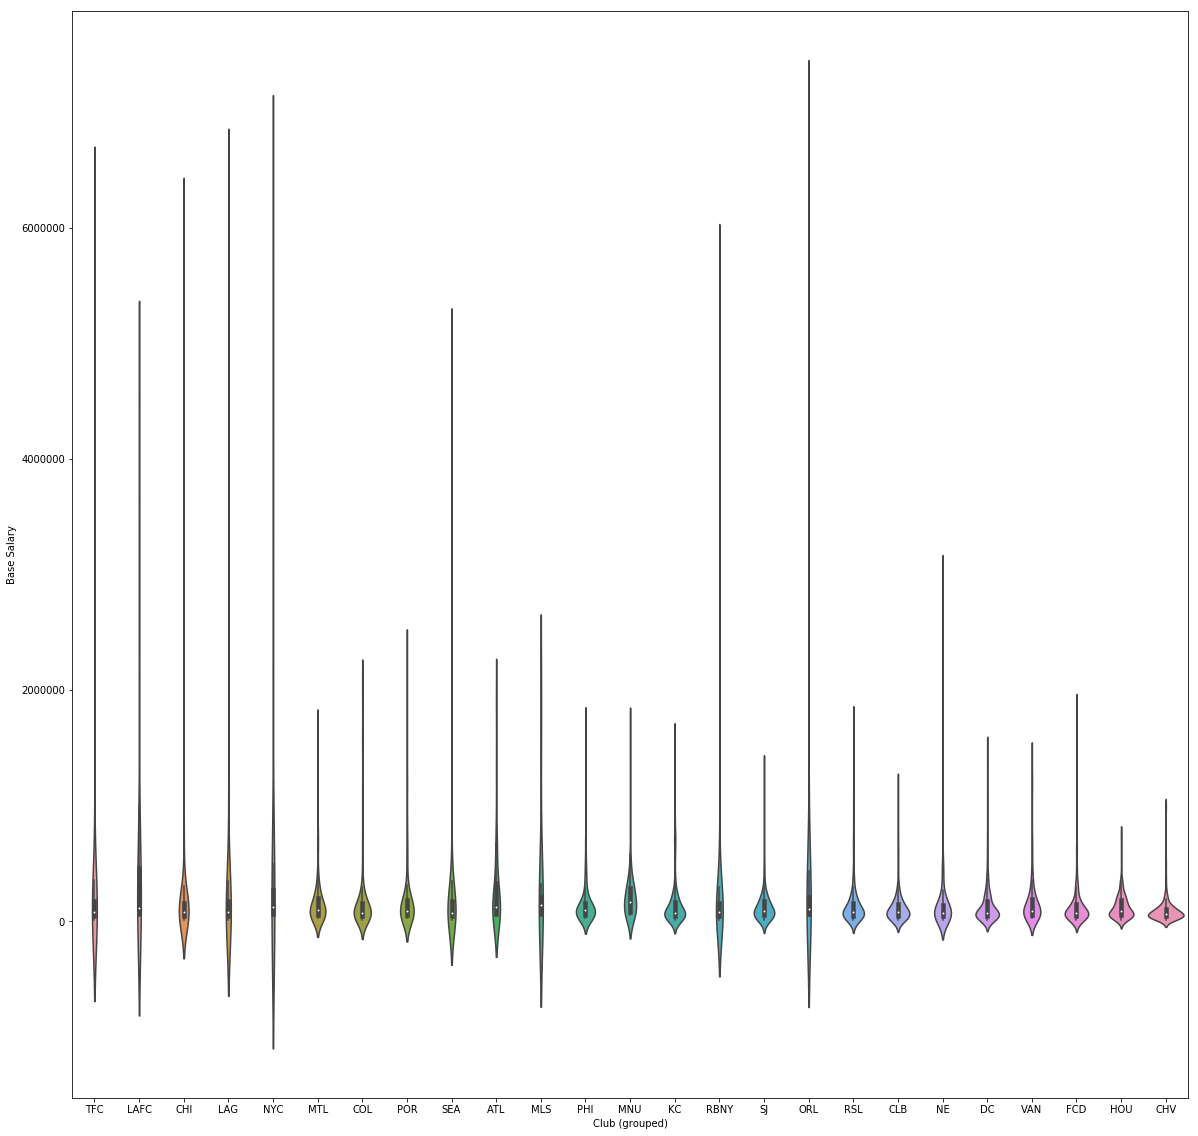

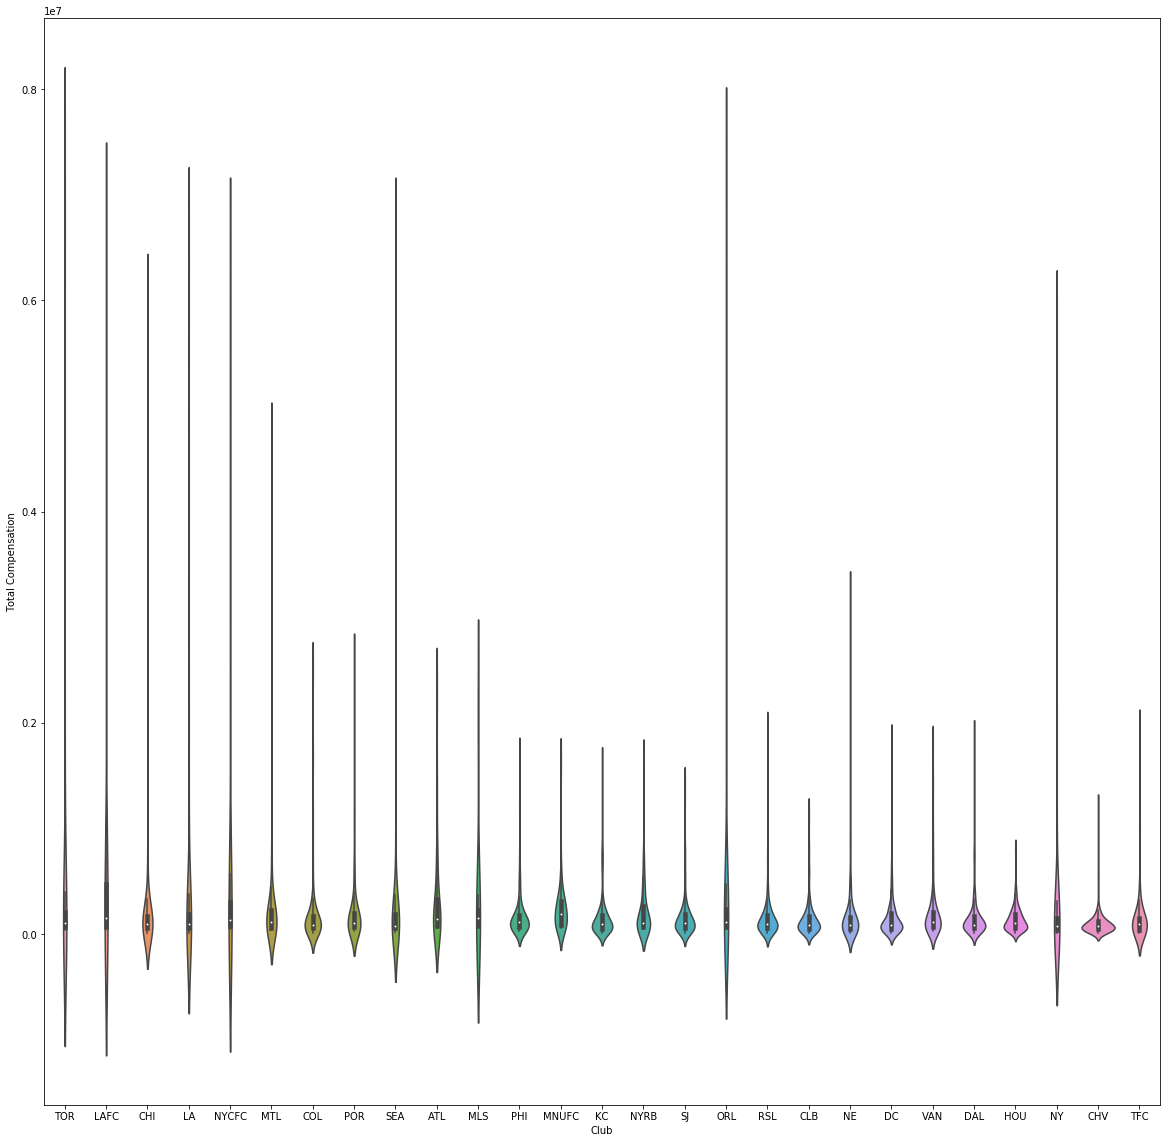

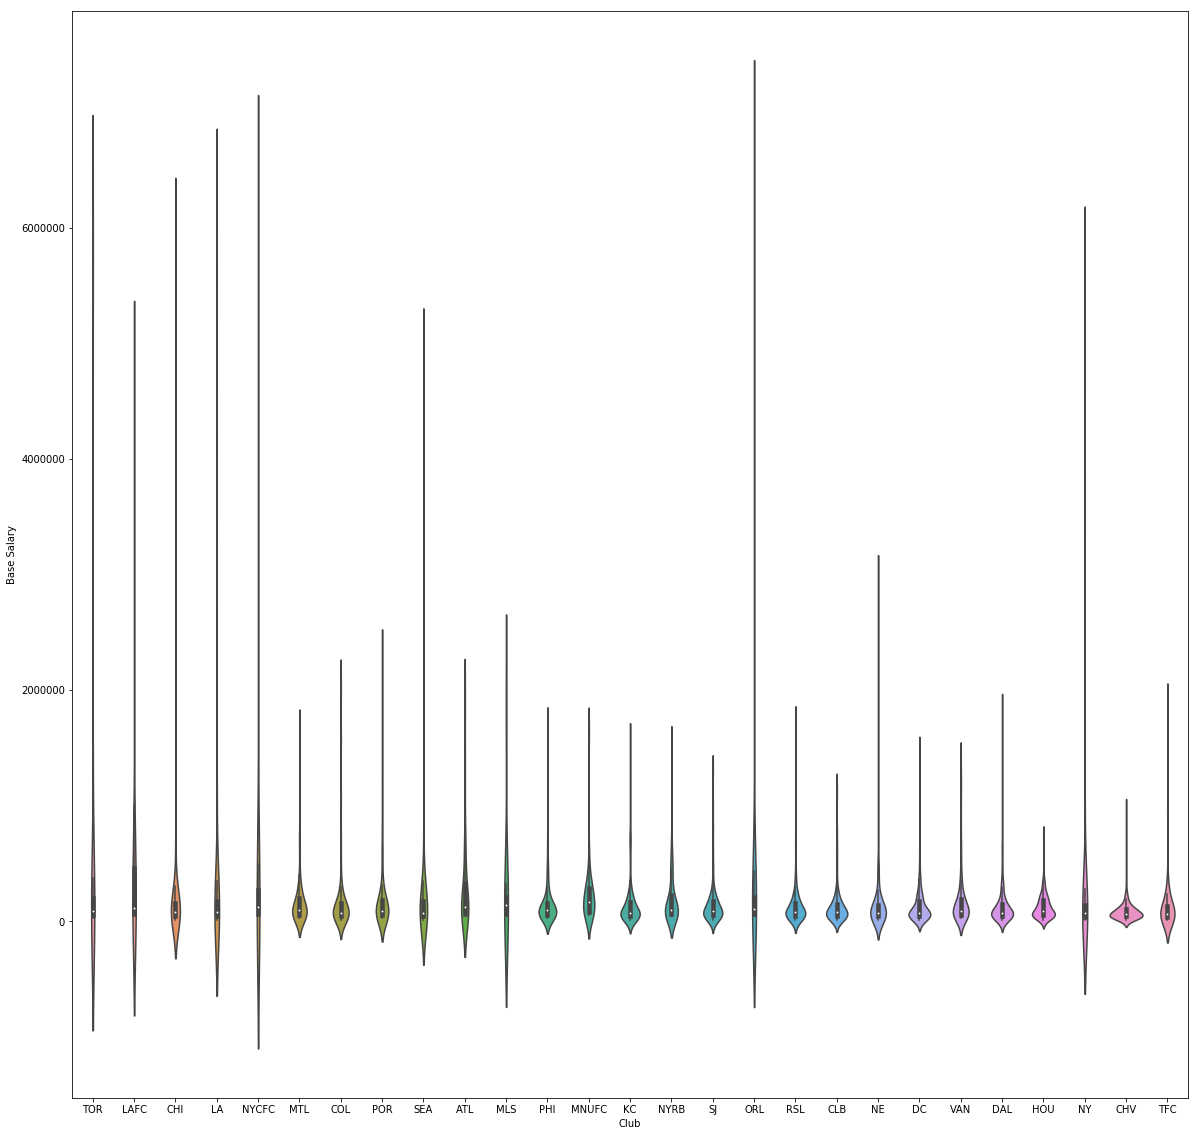

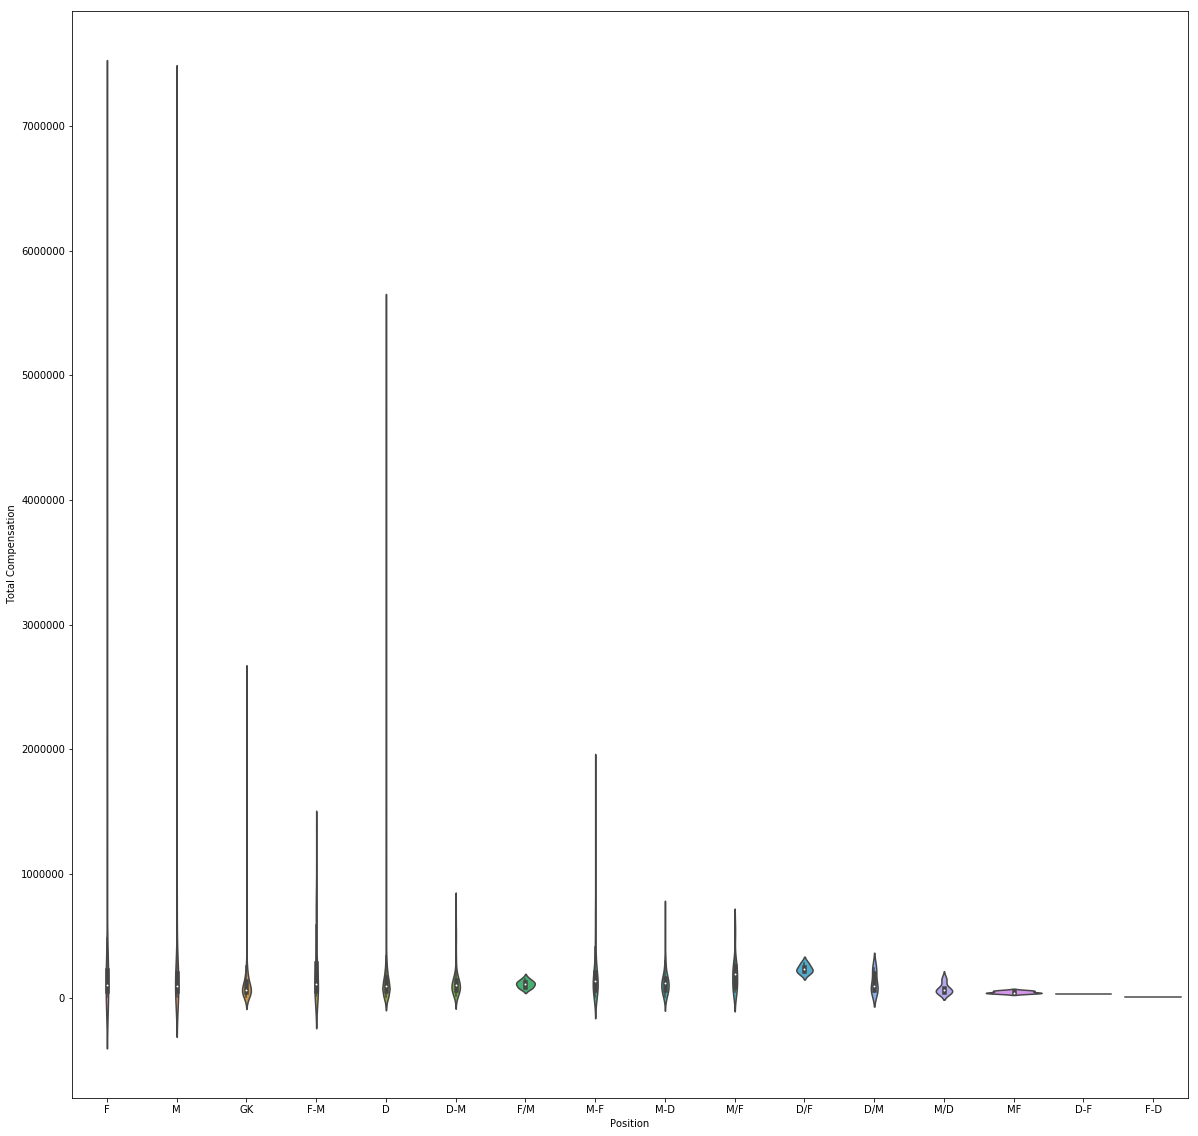

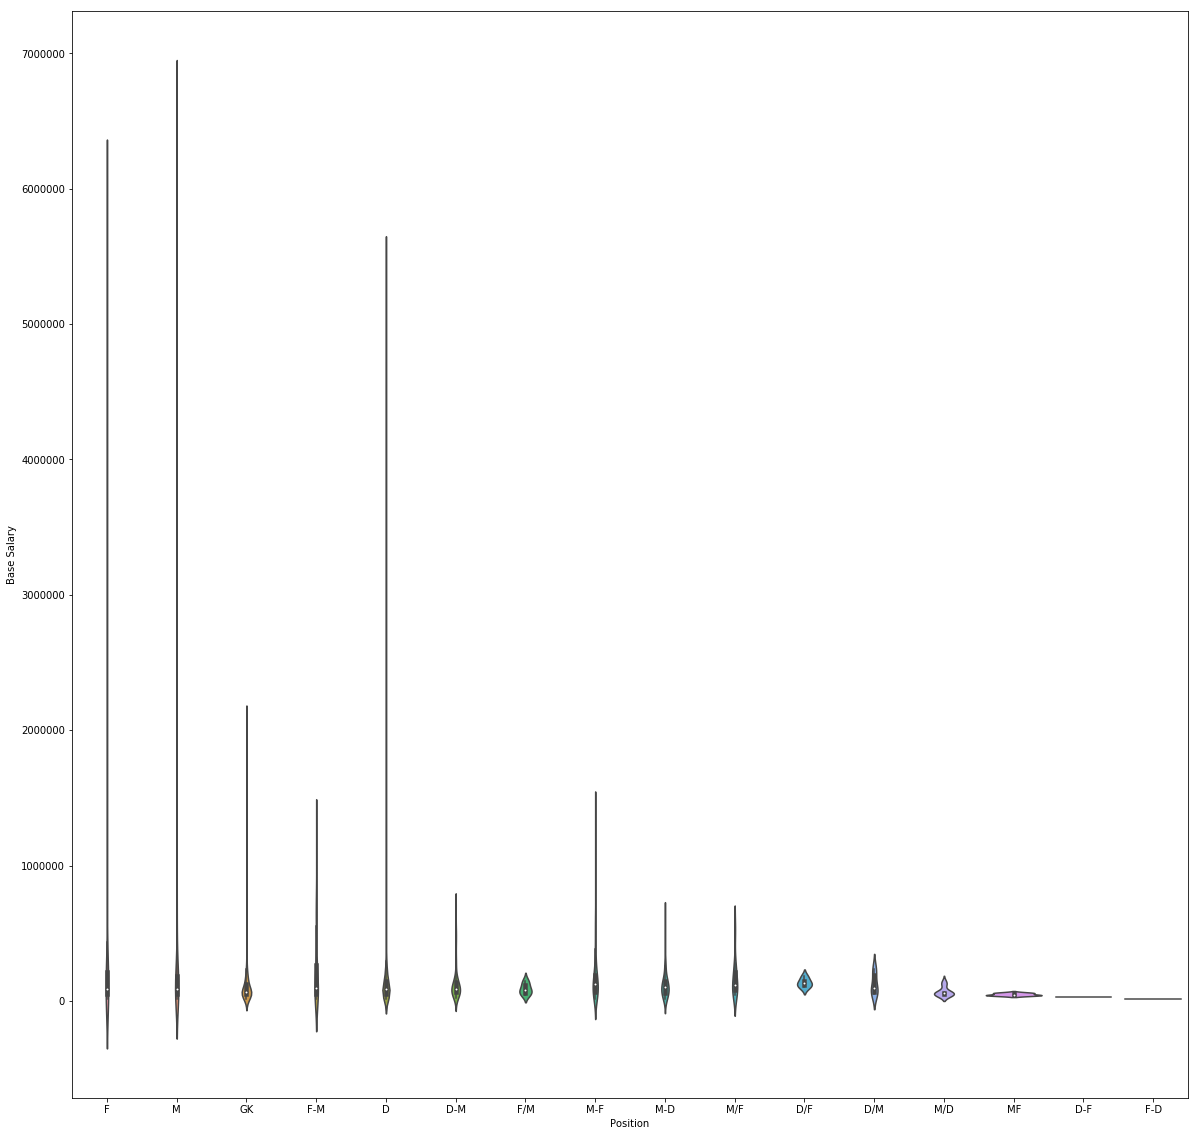

In [20]:
for i in ['Club (grouped)','Club','Position']:
    for j in ['Total Compensation','Base Salary']:
        plt.figure(figsize=(20,20))
        sns.violinplot(x=i,y=j,data=df);
        plt.show()

In [21]:
df = pd.read_excel('/home/aryan/Downloads/MLS_SalariesEXL.xlsx')

In [22]:
df.columns

Index(['Year', 'Club (grouped)', 'Club', 'Position', 'Total Compensation',
       'Base Salary'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['Club (grouped)'] = le.fit_transform(df['Club (grouped)'])

In [24]:
df['Club'] = le.fit_transform(df['Club'])

In [25]:
df['Position'] = le.fit_transform(df['Position'])

TypeError: argument must be a string or number

Observing this Error we decided to use our self-made custom Label Encoding for the Position Attribute which is done as follows

In [26]:
P = df['Position'].value_counts().index.tolist()
P

['M',
 'D',
 'F',
 'GK',
 'M-F',
 'D-M',
 'M-D',
 'F-M',
 'M/F',
 'M/D',
 'MF',
 'D/M',
 'F/M',
 'D/F',
 'F-D',
 'D-F']

In [27]:
P_dict = {}
for i in range(len(P)):
    P_dict[P[i]] = i+1

In [28]:
P_dict

{'M': 1,
 'D': 2,
 'F': 3,
 'GK': 4,
 'M-F': 5,
 'D-M': 6,
 'M-D': 7,
 'F-M': 8,
 'M/F': 9,
 'M/D': 10,
 'MF': 11,
 'D/M': 12,
 'F/M': 13,
 'D/F': 14,
 'F-D': 15,
 'D-F': 16}

In [29]:
df['Position'] = df['Position'].replace(P_dict)

In [30]:
df['Position'].value_counts()

1.0     2067
2.0     1782
3.0     1299
4.0      669
5.0      131
6.0      101
7.0       60
8.0       55
9.0       20
10.0       9
11.0       7
12.0       6
13.0       6
14.0       4
15.0       1
16.0       1
Name: Position, dtype: int64

/home/aryan/Anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/home/aryan/Anaconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



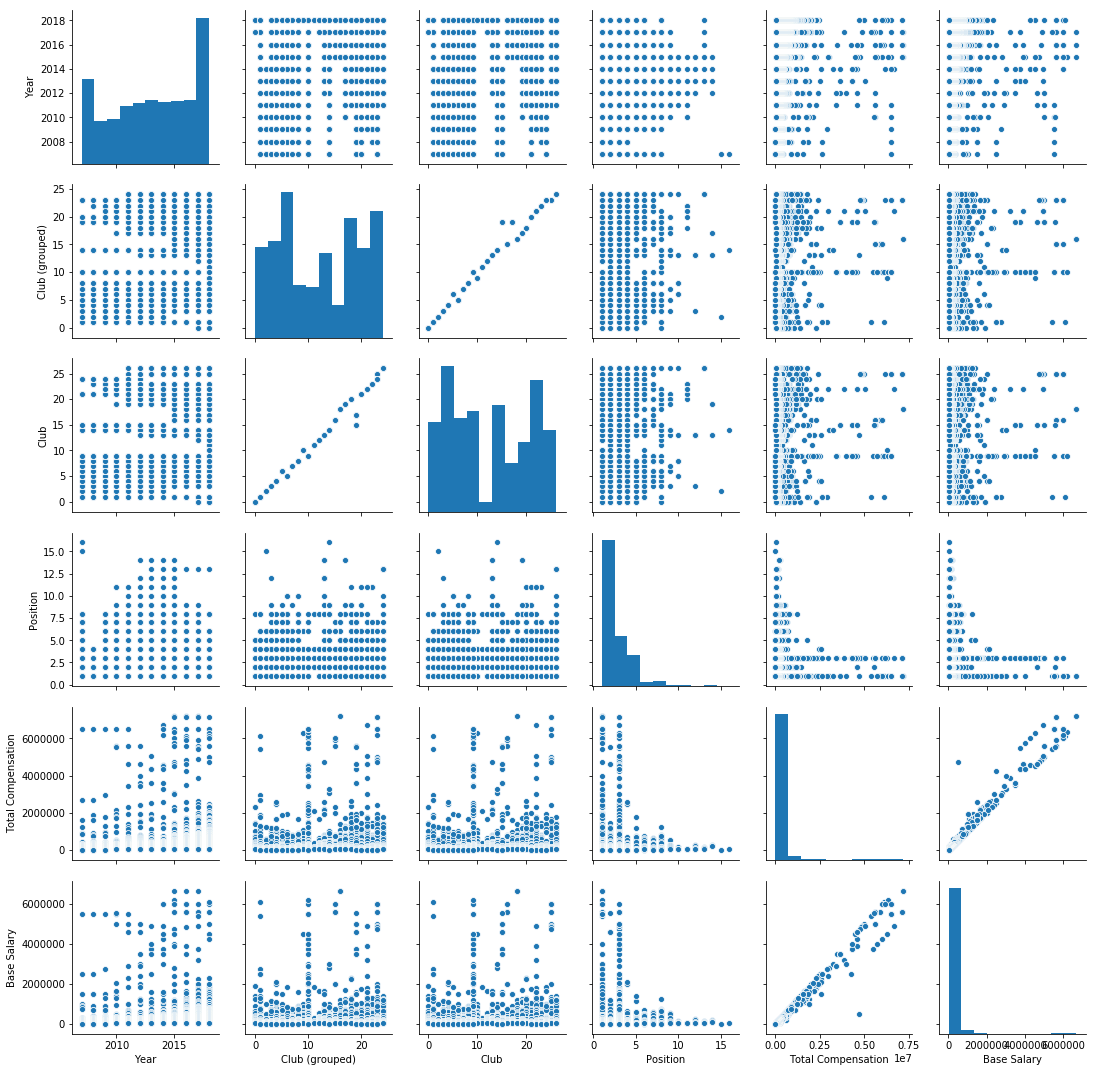

In [31]:
sns.pairplot(df)

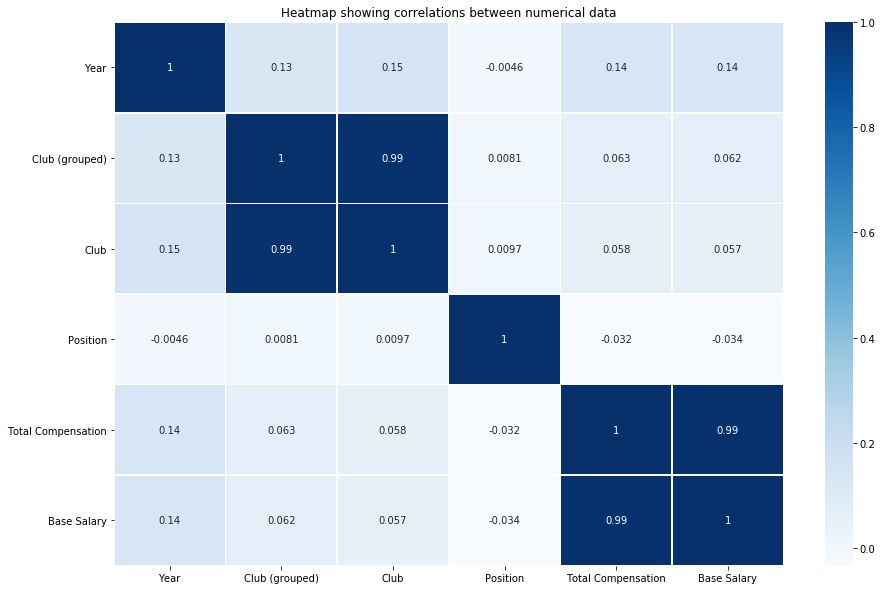

In [32]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()